In [ ]:
import numpy as np
import sklearn
import mglearn
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
import matplotlib

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=.5, random_state=1)

# We rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

In [ ]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

# mglearn.plots.plot_2d_separator(gbrt, X_train, fill=True, alpha=.3)
# mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")
print(y_train_named)

In [ ]:
print(gbrt.decision_function(X_test)[:6])


In [ ]:
print("Thresholded decision function:\n",gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

In [ ]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",np.all(pred == gbrt.predict(X_test)))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimumL {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

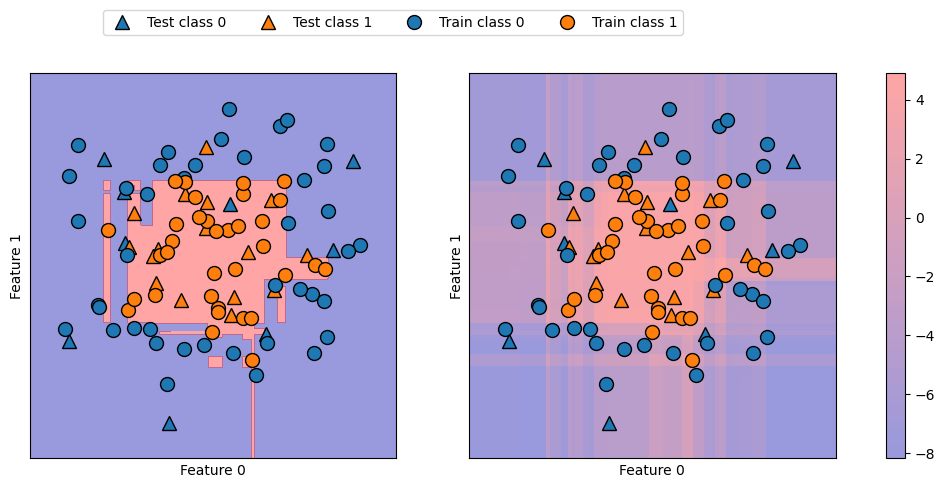

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

    
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[1].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(-1, 1.1))


plt.show()
